In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json as js
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition 2.csv')
df = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis = 1)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [2]:
df_category = df[['OverTime', 'TrainingTimesLastYear', 'StockOptionLevel', 'RelationshipSatisfaction', 'JobSatisfaction', 'JobRole', 'JobInvolvement', 'EnvironmentSatisfaction', 'Department', 'BusinessTravel', 'Education', 'EducationField', 'Gender', 'MaritalStatus', 'JobLevel', 'Attrition', 'PerformanceRating', 'WorkLifeBalance']]
df_numeric = df[['PercentSalaryHike', 'MonthlyRate', 'HourlyRate', 'Age', 'DailyRate', 'DistanceFromHome', 'NumCompaniesWorked', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'MonthlyIncome']]
df_reponse = df[['Attrition', 'PerformanceRating', 'WorkLifeBalance', 'MonthlyIncome']]

In [3]:
one_hots = ['Department', 'EducationField', 'JobRole']
final_dic = {}
for one_hot in one_hots:
    dic = {i+'_'+one_hot:[] for i in df_category[one_hot].unique()}
    for j in df_category[one_hot]:
        for n in dic:
            name = n.split('_')[0]
            if name == j:
                dic[n].append(1)
            else:
                dic[n].append(0)
    final_dic.update(dic)
one_hot_df =  pd.DataFrame(final_dic)
df_category = pd.concat([df_category.drop(one_hots, axis=1),one_hot_df], axis=1)

df_category.loc[df_category['Attrition'] == 'Yes','Attrition'] = 1
df_category.loc[df_category['Attrition'] == 'No','Attrition'] = 0

df_category.loc[df_category['Gender'] == 'Male','Gender'] = 1
df_category.loc[df_category['Gender'] == 'Female','Gender'] = 0

df_category.loc[df_category['OverTime'] == 'Yes','OverTime'] = 1
df_category.loc[df_category['OverTime'] == 'No','OverTime'] = 0

df_category.loc[df_category['BusinessTravel'] == 'Non-Travel','BusinessTravel'] = 0
df_category.loc[df_category['BusinessTravel'] == 'Travel_Rarely','BusinessTravel'] = 1
df_category.loc[df_category['BusinessTravel'] == 'Travel_Frequently','BusinessTravel'] = 2 

df_category.loc[df_category['MaritalStatus'] == 'Single','MaritalStatus'] = 0
df_category.loc[df_category['MaritalStatus'] == 'Married','MaritalStatus'] = 1
df_category.loc[df_category['MaritalStatus'] == 'Divorced','MaritalStatus'] = 2 

df_category.head()

,OverTime,TrainingTimesLastYear,StockOptionLevel,RelationshipSatisfaction,JobSatisfaction,JobInvolvement,EnvironmentSatisfaction,BusinessTravel,Education,Gender,...,Human Resources_EducationField,Sales Executive_JobRole,Research Scientist_JobRole,Laboratory Technician_JobRole,Manufacturing Director_JobRole,Healthcare Representative_JobRole,Manager_JobRole,Sales Representative_JobRole,Research Director_JobRole,Human Resources_JobRole
0,1,0,0,1,4,3,2,1,2,0,...,0,1,0,0,0,0,0,0,0,0
1,0,3,1,4,2,2,3,2,1,1,...,0,0,1,0,0,0,0,0,0,0
2,1,3,0,2,3,2,4,1,2,1,...,0,0,0,1,0,0,0,0,0,0
3,1,3,0,3,3,3,4,2,4,0,...,0,0,1,0,0,0,0,0,0,0
4,0,3,1,4,2,3,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0


,Cumulative Variance Ratio,Explained Variance Ratio
0,0.308955,0.308955
1,0.435465,0.126510
2,0.516809,0.081345
3,0.597458,0.080648
4,0.674927,0.077469
5,0.748481,0.073554
6,0.819609,0.071128
7,0.875543,0.055934
8,0.916377,0.040834
9,0.952554,0.036177


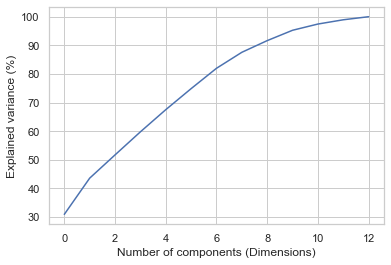

None

In [5]:
sc = StandardScaler()
df_numeric_scaled = sc.fit_transform(df_numeric)

pca = PCA(n_components=None)
pca.fit(df_numeric_scaled)

evr = pca.explained_variance_ratio_
cvr = np.cumsum(pca.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(20))

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")
display(plt.show())

In [6]:
pca = PCA(n_components=9)
df_numeric_pca = pca.fit_transform(df_numeric_scaled)
df_numeric_pca = pd.DataFrame(df_numeric_pca)
print(df_numeric_pca.head())
print("\nSize: ")
print(df_numeric_pca.shape)

          0         1         2         3         4         5         6  \
0 -0.267489  1.612452 -0.162541 -0.932900 -1.433168  1.012589  0.830271   
1  0.856526 -0.365852 -0.165184  1.944438  1.237912 -0.673868  1.723922   
2 -2.197847  1.431922  1.408648 -2.193468 -0.517665 -0.216832  0.203104   
3 -0.568928 -0.662374 -0.709002 -0.535495 -0.043174  2.349378  0.139465   
4 -1.567021  0.980320 -1.791146 -0.541636  0.480218  0.104882 -0.434996   

          7         8  
0  1.498483 -0.906336  
1 -0.309550 -0.906684  
2  0.684813  0.239880  
3 -0.014291  0.450256  
4  2.329865 -0.003300  

Size: 
(1470, 9)


In [7]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(0, num_pc))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_numeric.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
variable,,,,,,,,,
PercentSalaryHike,-0.015374,-0.005817,0.489364,0.281066,0.620075,-0.292851,0.456225,0.012796,0.019504
MonthlyRate,0.001123,0.087325,-0.314104,0.621058,-0.035388,0.593102,0.384609,0.063469,-0.044984
HourlyRate,-0.011327,0.061919,0.449101,-0.019256,-0.745548,-0.100788,0.475604,-0.004740,0.017957
Age,0.280098,0.475965,0.020649,0.033078,0.010827,-0.080449,-0.018366,-0.197022,0.008469
DailyRate,-0.006814,0.079083,0.525777,-0.370578,0.170932,0.732266,-0.098509,-0.026858,0.040164
DistanceFromHome,0.004681,-0.047422,0.420806,0.625496,-0.165353,-0.026136,-0.632499,0.019371,0.003728
NumCompaniesWorked,0.030733,0.559472,0.002875,-0.057532,0.017545,-0.067984,-0.065207,0.779001,-0.127323
TotalWorkingYears,0.415216,0.320026,0.001152,0.016423,0.011479,-0.023287,-0.026158,-0.199933,-0.039501
YearsAtCompany,0.443545,-0.213066,-0.000449,-0.015170,-0.022601,0.006337,0.016261,-0.000517,-0.104278


In [8]:
df_category = df_category.astype('int')
df = pd.concat([df_category, df_numeric, df_numeric_pca], axis=1)
df_model = pd.concat([df_category, df_numeric_pca], axis=1)
df.to_csv('cleaned_data.csv')
df

,OverTime,TrainingTimesLastYear,StockOptionLevel,RelationshipSatisfaction,JobSatisfaction,JobInvolvement,EnvironmentSatisfaction,BusinessTravel,Education,Gender,...,MonthlyIncome,0,1,2,3,4,5,6,7,8
0,1,0,0,1,4,3,2,1,2,0,...,5993,-0.267489,1.612452,-0.162541,-0.932900,-1.433168,1.012589,0.830271,1.498483,-0.906336
1,0,3,1,4,2,2,3,2,1,1,...,5130,0.856526,-0.365852,-0.165184,1.944438,1.237912,-0.673868,1.723922,-0.309550,-0.906684
2,1,3,0,2,3,2,4,1,2,1,...,2090,-2.197847,1.431922,1.408648,-2.193468,-0.517665,-0.216832,0.203104,0.684813,0.239880
3,1,3,0,3,3,3,4,2,4,0,...,2909,-0.568928,-0.662374,-0.709002,-0.535495,-0.043174,2.349378,0.139465,-0.014291,0.450256
4,0,3,1,4,2,3,1,1,1,1,...,3468,-1.567021,0.980320,-1.791146,-0.541636,0.480218,0.104882,-0.434996,2.329865,-0.003300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,3,1,3,4,4,3,2,2,1,...,2571,-0.737371,0.538532,0.613465,0.960740,0.988985,-0.180241,-1.654153,0.231400,-0.412426
1466,0,5,1,1,1,2,4,1,1,1,...,9991,0.725391,0.140641,-1.233597,0.499639,0.819495,0.391727,0.091686,0.394314,-0.913625
1467,1,0,1,2,2,4,2,1,3,1,...,6142,-1.329547,-0.851402,0.351346,-0.249037,-0.111438,-2.309217,1.197643,-0.576452,-0.131962
1468,0,3,0,4,2,2,4,2,3,1,...,5390,1.102146,0.311703,-0.148646,-0.924588,0.154829,0.364875,0.242491,-0.503699,-1.173900
